# Setup

In [18]:
# Load libraries
suppressPackageStartupMessages(library("sva"))
suppressPackageStartupMessages(library("dplyr"))

# Load data

In [19]:
datasets <- c('MA-1','MA-2','MA-3','RNAseq-1','RNAseq-2')

In [20]:
logtpms <- list()
for (ds in datasets){
    filename <- paste('../../data/processed_data/',ds,'_bc.csv',sep='')
    logtpms[[ds]] <- data.matrix(read.table(filename,header=TRUE,row.names=1,sep=','))
}

In [21]:
alltpms <- do.call(cbind,logtpms)

In [22]:
head(alltpms)

,dinI___U_N0025_r1,dinI___U_N0025_r2,dinI___U_N0025_r3,dinP___U_N0025_r1,dinP___U_N0025_r2,dinP___U_N0025_r3,lexA___U_N0025_r1,lexA___U_N0025_r2,lexA___U_N0025_r3,lon___U_N0025_r1,⋯,tob9__tob__3,wt__ctrl2__1,wt__ctrl2__2,wt__ctrl2__3,wt__ctrl3__1,wt__ctrl3__2,wt__ctrl3__3,wt__ctrl4__1,wt__ctrl4__2,wt__ctrl4__3
b0001,0.84032388,0.81711601,0.78239520,0.45653555,0.8340565,0.83715899,0.8115522,0.6927565,1.0124150,0.7407093,⋯,2.27925537,-0.154957514,-0.5616925300,0.71500332,-0.24731748,-0.22739816,0.55607016,-0.39920580,-0.21104973,0.56221700
b0002,0.36067442,0.31146098,0.40328950,0.53456203,0.6467847,0.51307920,0.7645474,0.7014513,0.6527643,0.6167555,⋯,2.66644441,-0.355339708,0.0865265568,0.32873251,0.22001967,-0.48182230,0.26070619,0.27778259,-0.18162013,-0.07743796
b0003,0.81761499,0.71556717,0.83669504,0.86188092,0.9919344,0.87778967,1.1090167,1.0250410,1.0602737,0.9536029,⋯,0.83586757,-0.222445934,0.0002837933,0.25491710,0.12686432,-0.26536498,0.10571350,-0.21486438,0.40889829,-0.22524430
b0004,-0.01455885,0.09466452,0.09534216,0.13242911,0.3128030,0.07767396,0.2508354,0.2065910,0.3046920,0.3283538,⋯,0.07796515,-0.286261966,0.0684620571,0.24442951,0.21399574,-0.28523147,0.05810641,-0.27893752,0.30771079,-0.07103395
b0005,0.15125952,0.20684672,0.17055842,0.09191197,0.3614363,0.12467442,0.2715533,0.4198735,0.2724901,0.2400480,⋯,1.23859484,-0.193623038,0.0725546721,0.06011326,-0.08131157,-0.12191934,0.11333713,0.05855994,-0.07691200,-0.07024587
b0006,1.00666252,0.93516251,0.86049530,0.88147476,1.0876809,0.62503167,0.8819863,0.8067040,0.8957225,1.0613736,⋯,-0.20314935,-0.006963527,-0.0690297980,0.05681067,0.12400067,0.02944759,-0.17298425,-0.16326789,0.03915274,0.11609631


In [23]:
group_list <- as.factor(rep(names(sapply(logtpms,ncol)),unname(sapply(logtpms,ncol))))

## PCA plot

In [24]:
library(ggplot2)
theme<-theme(panel.background = element_blank(),
             panel.border=element_rect(fill=NA),
             panel.grid.major = element_blank(),
             panel.grid.minor = element_blank(),
             strip.background=element_blank(),
             axis.text.x=element_text(colour="black"),
             axis.text.y=element_text(colour="black"),
             axis.ticks=element_line(colour="black"),
             plot.margin=unit(c(1,1,1,1),"line"))

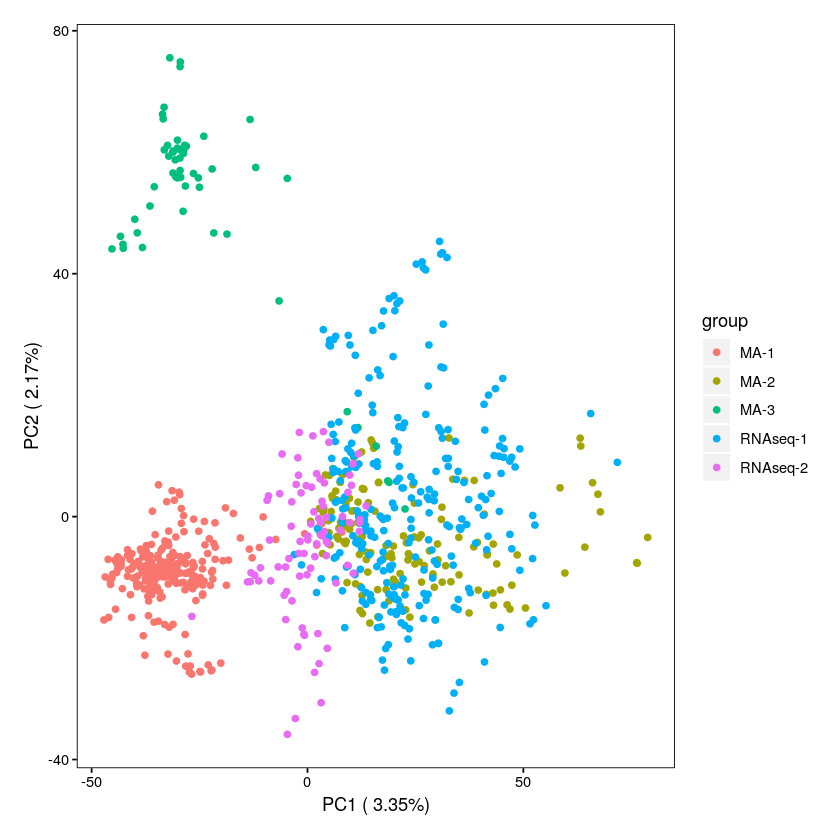

In [25]:
df_pca <- prcomp(t(alltpms), center=TRUE,scale=TRUE)
scores <- as.data.frame(df_pca$x)
scores$group <- group_list

percentage <- round(df_pca$sdev / sum(df_pca$sdev) * 100, 2)
percentage <- paste( colnames(scores), "(", paste(as.character(percentage), "%", ")", sep="") )

ggplot(data = scores, aes(x = PC1, y = PC2,color=group)) +
geom_point() + theme + xlab(percentage[1]) + ylab(percentage[2])

# Combat Correction

In [26]:
mod <- model.matrix(~1,data=data.frame(group_list))
combat_data <- ComBat(dat=alltpms,batch=group_list,mod=mod)

Found5batches
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [27]:
combat_list = list()
combat_bc = list()
for (ds in datasets){
    combat_list[[ds]] <- combat_data[,group_list == ds]
}

In [28]:
combat_set1 <- combat_data[,group_list == 'MA-1']
combat_set1_bc <- combat_set1 - rowMeans(combat_set1[,c('WT_N0000_r1','WT_N0000_r2')])

combat_set2 <- combat_data[,group_list == 'MA-2']
combat_set2_bc <- combat_set2 - rowMeans(combat_set2[,c('aero__wt__1','aero__wt__2','aero__wt__3')])

combat_set3 <- combat_data[,group_list == 'MA-3']
combat_set3_bc <- combat_set3 - rowMeans(combat_set3[,c('purR__wt__1','purR__wt__2')])

combat_set4 <- combat_data[,group_list == 'RNAseq-1']
combat_set4_bc <- combat_set4 - rowMeans(combat_set4[,c('control__wt_glc__1','control__wt_glc__2')])

combat_set5 <- combat_data[,group_list == 'RNAseq-2']
combat_set5_bc <- combat_set5 - rowMeans(combat_set5[,c('wt__ctrl1__1','wt__ctrl1__2','wt__ctrl1__3')])

In [29]:
baseline=list(c('WT_N0000_r1','WT_N0000_r2'),
              c('aero__wt__1','aero__wt__2','aero__wt__3'),
              c('purR__wt__1','purR__wt__2'),
              c('control__wt_glc__1','control__wt_glc__2'),
              c('wt__ctrl1__1','wt__ctrl1__2','wt__ctrl1__3'))
names(baseline) <- datasets

## PCA plot

In [30]:
full_dataset <- cbind(combat_set1,combat_set2,combat_set3,combat_set4,combat_set5)

In [31]:
library('pheatmap')
library("RColorBrewer")

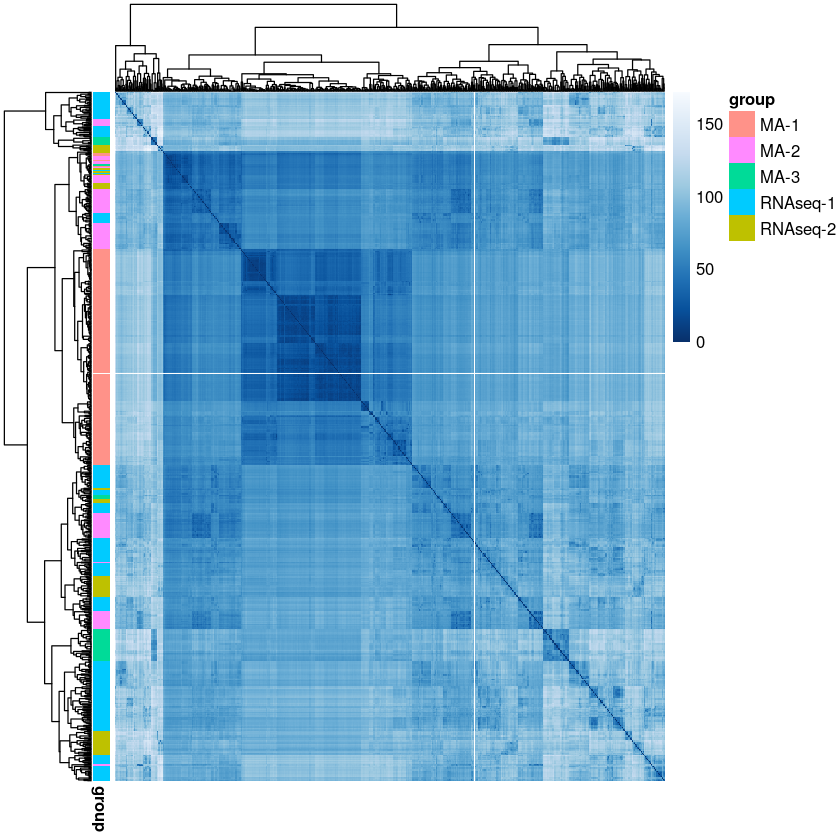

In [32]:
sampleDistMatrix <- as.matrix(dist(t(alltpms)))

cols <- data.frame(group_list)
dimnames(cols) <- list(rownames(sampleDistMatrix),'group')

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,col=colors,annotation_row=cols,show_rownames=FALSE,show_colnames=FALSE)

In [33]:
sampleDistMatrix <- as.matrix(dist(t(full_dataset)))

cols <- data.frame(group_list)
dimnames(cols) <- list(rownames(sampleDistMatrix),'group')

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,col=colors,annotation_row=cols,show_rownames=FALSE,show_colnames=FALSE)

In [ ]:
df_pca <- prcomp(t(full_dataset), center=TRUE,scale=TRUE)
scores <- as.data.frame(df_pca$x)
scores$group <- group_list

percentage <- round(df_pca$sdev / sum(df_pca$sdev) * 100, 2)
percentage <- paste( colnames(scores), "(", paste(as.character(percentage), "%", ")", sep="") )

ggplot(data = scores, aes(x = PC1, y = PC2,color=group)) +
geom_point() + theme + xlab(percentage[1]) + ylab(percentage[2])

# Save data

In [46]:
for (ds in datasets){
    combat_ds <- combat_data[,group_list == ds]
    combat_ds_bc <- combat_ds - rowMeans(combat_ds[,baseline[[ds]]])
    
    write.table(combat_ds, file=paste('../../data/processed_data/combat_bc/',ds,'.csv',sep=''),
                col.names=TRUE, sep=',')
    write.table(combat_ds_bc, file=paste('../../data/processed_data/combat_bc/',ds,'_bc.csv',sep=''),
                col.names=TRUE, sep=',')
}

In [34]:
write.table(cbind(combat_set1_bc,combat_set2_bc,combat_set3_bc,combat_set4_bc,combat_set5_bc),
            file='../../data/processed_data/batch/full_dataset_bc.csv',sep=',')
write.table(cbind(combat_set1,combat_set2,combat_set3,combat_set4,combat_set5),
            file='../../data/processed_data/batch/full_dataset.csv',sep=',')